# Boosting

### Задание 1.

Мы упоминали о том, что у функция потерь AdaBoost имеет более жесткий штраф по отношению к ошибкам классификации, чем другие часто используемые функции. Реализуйте функции logloss и AdaBoost loss, которые возвращают значения штрафов, и посмотрите по графику, насколько сильно они отличаются (примем x = y * y^).

✅ Проверка пройдена успешно!


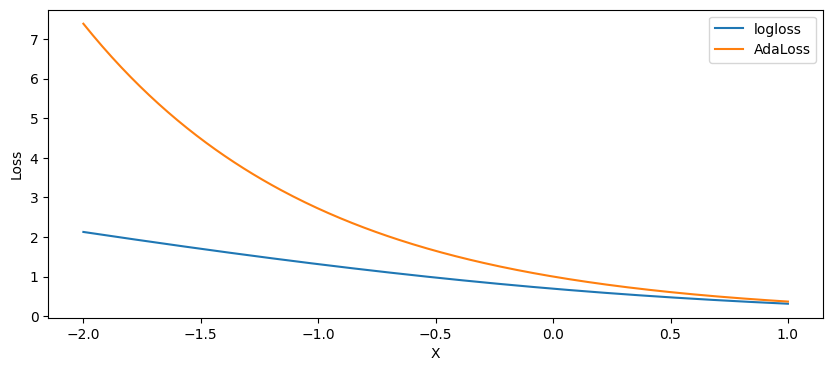

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(-2, 1, 300)

def logloss(x):
    """Логистическая функция потерь"""
    return np.log(1 + np.exp(-x))
    

def AdaLoss(x):
    """Функция потерь AdaBoost"""
    return np.exp(-x)

plt.figure(figsize=(10, 4))
plt.plot(x, logloss(x), label='logloss')
plt.plot(x, AdaLoss(x), label='AdaLoss')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Loss')

x_check = np.array([-2, 0, 2])
y_log = np.array([2.127, 0.693, 0.127])
y_ada = np.array([7.389, 1., 0.135])

assert np.allclose(logloss(x_check), y_log, atol=1e-3), f'Function logloss is not verified'
assert np.allclose(AdaLoss(x_check), y_ada, atol=1e-3), f'Function AdaLoss is not verified'

print("✅ Проверка пройдена успешно!")


При x < 0 (ошибки классификатора)
→ AdaBoost даёт намного больший штраф, чем logloss.

При x > 0 (правильная классификация)
→ обе функции сходятся к нулю, но logloss снижается медленнее.

LogLoss — мягче, устойчивее к выбросам, используется в большинстве современных моделей.

AdaLoss — агрессивнее, фокусируется на "трудных" объектах (поэтому AdaBoost так сильно корректирует ошибки).

### Задание 2.

Когда дело доходит до оптимизации алгоритма, зачастую достаточно сложно подобрать сразу такие параметры, при которых качество классификатора было бы максимальным. В этом помогает либо опыт работы с различными методами, либо уже отмеченные другими специалистами взаимосвязи между количеством данных, самим алгоритмом, различными гиперпараметрами и т.п.

В случае с бустингом было отмечено, что количество деревьев, при котором качество алгоритма максимально, зависит от темпа обучения: чем меньше темп, тем больше деревьев обычно требуется.

В этом задании попробуйте последовательно подобрать такие гиперпараметры n_estimators и learning_rate в алгоритме GBC, чтобы accuracy была равна 1: сначала последовательно увеличивайте количество базовых деревьев, не меняя при этом learning_rate, а затем поменяйте количество деревьев снова на 1 и уже меняйте гиперпараметр learning_rate в пределах (0, 1), не включая границы. Если  accuracy не будет равна 1 при граничном значении learning_rate, добавляйте по одному базовому алгоритму и смотрите, что получится (напомним, что зависимость нелинейная - при значительном увеличении learning_rate количество деревьев может увеличиться всего на одну-две позиции.

Сначала запустите следующий код со сгенерированными данными.

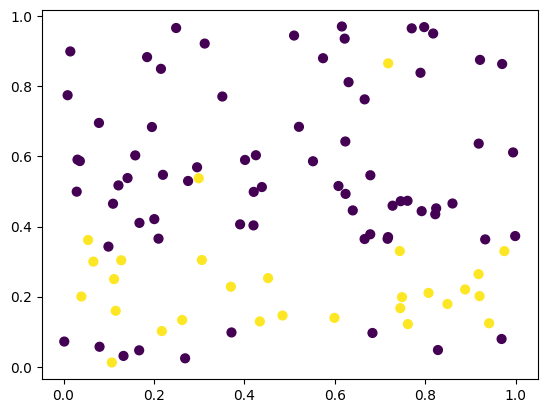

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def plot(alg, data, target):
    xx, yy = np.meshgrid(np.linspace(0., 1., 100), np.linspace(0., 1., 100))
    Z = alg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=10, cmap=plt.cm.bwr, alpha=0.3)

    plt.scatter(data[:, 0], data[:, 1], s=20, c=targets)

    plt.xlim((0, 1))
    plt.ylim((0, 1))


np.random.seed(15)
data = np.random.rand(100, 2)
targets = np.empty(100)
targets[1 / data[:, 1] > 2] = 1
targets[1 / data[:, 1] < 3] = 0
targets[1 / data[:, 1] > 10] = 0
targets[[1, 3, 6, 15, 36]] = 1

plt.scatter(data[:, 0], data[:, 1], s=40, c=targets)

learning_rate — уменьшает вклад каждого дерева в финальное решение.
Чем меньше значение → тем больше деревьев нужно, чтобы достичь того же качества.

n_estimators — количество слабых моделей (обычно деревьев).
Чем их больше → тем выше сложность модели и тем лучше она подстраивается под данные (до переобучения).

В следующей ячейке можете подбирать параметры алгоритма.

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=1, learning_rate=0.1) # подгонка гиперпараметров
model = gbc.fit(data, targets)
pred = gbc.predict(data)
plot(gbc, data, targets)

print(f'Accuracy: {accuracy_score(targets, pred)}')

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

acc_scores = []
for n in range(1, 50):
    gbc = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42)
    gbc.fit(data, targets)
    pred = gbc.predict(data)
    acc = accuracy_score(targets, pred)
    acc_scores.append(acc)
    if acc == 1:
        print(f'✅ Accuracy = 1 достигнута при n_estimators = {n}, learning_rate = 0.1')
        break

acc_scores

✅ Accuracy = 1 достигнута при n_estimators = 33, learning_rate = 0.1


[0.72,
 0.72,
 0.72,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.98,
 0.97,
 0.99,
 0.99,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.99,
 0.98,
 0.99,
 0.99,
 0.99,
 1.0]

In [6]:
acc_scores = []

for lr in np.linspace(0.01, 1.0, 100):
    gbc = GradientBoostingClassifier(n_estimators=1, learning_rate=lr, random_state=42)
    gbc.fit(data, targets)
    pred = gbc.predict(data)
    acc = accuracy_score(targets, pred)
    acc_scores.append(acc)
    if acc == 1:
        print(f'✅ Accuracy = 1 достигнута при n_estimators = 1, learning_rate = {lr:.2f}')
        break
acc_scores

[0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98]

In [7]:
for lr in [1.0, 0.5, 0.3, 0.1, 0.05]:
    for n in range(1, 60):
        gbc = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        gbc.fit(data, targets)
        pred = gbc.predict(data)
        acc = accuracy_score(targets, pred)
        if acc == 1:
            print(f'✅ Accuracy = 1 при learning_rate={lr}, n_estimators={n}')
            break


✅ Accuracy = 1 при learning_rate=1.0, n_estimators=3
✅ Accuracy = 1 при learning_rate=0.5, n_estimators=7
✅ Accuracy = 1 при learning_rate=0.3, n_estimators=10
✅ Accuracy = 1 при learning_rate=0.1, n_estimators=33


Чем меньше learning_rate, тем больше нужно деревьев для той же точности.

Зависимость нелинейная — при большом learning_rate достаточно нескольких деревьев,
но при малом приходится использовать десятки (или сотни).

На реальных данных обычно выбирают:
learning_rate ≈ 0.05–0.1 и n_estimators ≈ 100–300 для баланса между скоростью и качеством.